In [1]:
# imports 
%matplotlib inline

from IPython.display import YouTubeVideo
from IPython.display import Math

import sklearn
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

import numpy as np
import numpy.random as rng

import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups

In [7]:
# diabetes_data
diabetes_data = datasets.load_diabetes()
?diabetes_data

In [11]:
diabetes_data.data

(442, 10)

In [15]:
N = len(diabetes_data.target)
i = rng.randint(0,N-1,100)
diabetes_data.data[i,].shape

(100, 10)

In [26]:

X_train = diabetes_data.data[i,:]
y_train = diabetes_data.target[i]
X_train.shape

(100, 10)

In [29]:
# A linear model
model = LinearRegression()

# Train the model using the training sets
# i.e., find parameters that make the model best fit the data
model.fit(X_train, y_train)

# What are the parameters we found to be best?
# print('Optimal parameters: ')
# print('slope: {:.3f}\nintercept: {:.3f}'.format(model.coef_[0], model.intercept_ ))
model.coef_.shape

(10,)

In [31]:
y_pred = model.predict(X_train)

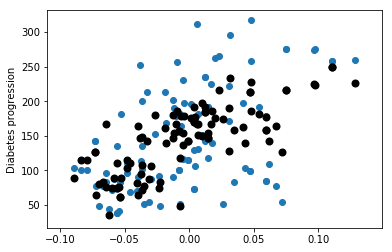

In [36]:
plt.scatter( X_train[:,2], y_train )
plt.scatter( X_train[:,2], y_pred, color='black', linewidth=2 )
plt.ylabel('Diabetes progression')
# plt.xlabel('Average blood pressure');

(array([  3.,   2.,   5.,  14.,  20.,  19.,  16.,   7.,   9.,   5.]),
 array([-143.85043319, -117.27310364,  -90.69577409,  -64.11844454,
         -37.54111499,  -10.96378544,   15.61354411,   42.19087366,
          68.76820321,   95.34553276,  121.92286231]),
 <a list of 10 Patch objects>)

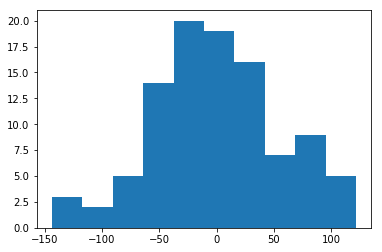

In [37]:
plt.hist( y_pred - y_train )

In [45]:
X_train.shape[0]


100

In [55]:
type( (1,1))

tuple

In [57]:
X1 = np.concatenate( (X_train, np.ones((X_train.shape[0], 1))), axis=1 ) 
X1.shape

p,resid,rank,s = np.linalg.lstsq( X1, y_train ) # Note this is not explicitly computing the SVD
y_linsolv_pred = np.matmul( X1, p ); # Compare this to the previous output


In [65]:
# y_linsolv_pred - y_pred

In [60]:
X_train.shape

(100, 10)

In [73]:
alist = [1,2,3,4,5]


4

In [92]:
X_train_poly = X_train[:,[1,2]]
X_train_poly

X_poly = np.concatenate(( np.ones((X_train_poly.shape[0], 1)), X_train_poly ), axis=1 )
X_poly.shape

(100, 3)

In [90]:
X_poly.shape

# (X_train_poly[:,0]**2).reshape(100,1).shape

(1, 100)

In [93]:
X_poly = np.concatenate(( X_poly, (X_train_poly[:,np.newaxis,0]**2) ), axis=1 )
X_poly = np.concatenate(( X_poly, (X_train_poly[:,np.newaxis,1]**2) ), axis=1 )
X_poly = np.concatenate(( X_poly, X_train_poly[:,np.newaxis,0]*X_train_poly[:,np.newaxis,1] ), axis=1 )
X_poly.shape

(100, 6)

In [94]:
p_poly,resid,rank,s = np.linalg.lstsq( X_poly, y_train ) # Note this is not explicitly computing the SVD
y_pred_poly_lsq = np.matmul( X_poly, p_poly ); # Compare this to the previous output


In [96]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_model = Pipeline(
    [('poly', PolynomialFeatures(degree=2)), 
     ('linear', LinearRegression())])

poly_model.fit( X_train_poly, y_train )
y_pred_poly = poly_model.predict( X_train_poly )


In [97]:
y_pred_poly - y_pred_poly_lsq

array([ -8.52651283e-14,   0.00000000e+00,  -8.52651283e-14,
        -2.84217094e-14,  -2.84217094e-14,  -9.94759830e-14,
        -4.26325641e-14,  -9.94759830e-14,  -2.84217094e-14,
        -9.94759830e-14,  -5.68434189e-14,  -8.52651283e-14,
        -9.94759830e-14,  -2.84217094e-14,   0.00000000e+00,
        -8.52651283e-14,  -5.68434189e-14,  -2.84217094e-14,
        -5.68434189e-14,  -8.52651283e-14,  -9.94759830e-14,
         0.00000000e+00,   0.00000000e+00,  -5.68434189e-14,
        -4.26325641e-14,  -9.94759830e-14,   0.00000000e+00,
        -8.52651283e-14,  -9.94759830e-14,   0.00000000e+00,
        -2.84217094e-14,  -9.94759830e-14,  -4.26325641e-14,
         2.84217094e-14,  -2.84217094e-14,  -2.84217094e-14,
        -8.52651283e-14,  -1.13686838e-13,   2.84217094e-14,
        -2.84217094e-14,  -4.26325641e-14,   0.00000000e+00,
        -2.84217094e-14,  -5.68434189e-14,   2.84217094e-14,
        -9.94759830e-14,  -2.84217094e-14,  -5.68434189e-14,
        -9.94759830e-14,

## Generating random data

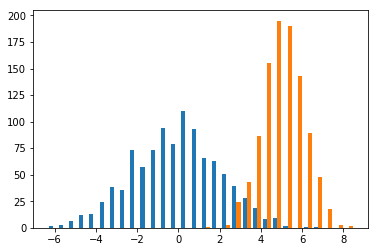

In [3]:
# get 1000x2 random samples from a normal (gaussian) distribution
# These have mean = 0, and variance = 1
x_normal = rng.randn(1000,2) 

# You can change the variance with multiplication
# now, the first column has variance 2
x_normal[:,0] = x_normal[:,0] * 2

# You can change the mean with addition
# now, the second column as mean 5
x_normal[:,1] = x_normal[:,1] + 5

# lets plot a histogram of both columns
# notice that it is smart about separating the two colums into different histograms
plt.hist( x_normal, bins=30 );

# Try another distribution
Look at [the documentation](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html) for numpy and try generating random data from a different distribution.
* What are the parameters of the distribution you chose?

# Matrix

## Build a matrix

In [4]:
a_list = [2, 3]
another_list = [4, 5]
a_list_of_lists = [a_list, another_list]
print( a_list_of_lists )
print( ' ' )

a_matrix = np.array(a_list_of_lists)
print( a_matrix )
print( ' ' )

a_vector = np.array( [[-0.5], [10]]) # write it like this so it's a column vector
print( a_vector )

[[2, 3], [4, 5]]
 
[[2 3]
 [4 5]]
 
[[ -0.5]
 [ 10. ]]


## Matrix-vector multiply

In [5]:
M_times_v = np.matmul( a_matrix, a_vector )
print( M_times_v )
print( ' ' )

# Another way to write this - see that the result is the same
print( a_matrix @ a_vector ) 

[[ 29.]
 [ 48.]]
 
[[ 29.]
 [ 48.]]


# Don't ever solve a linear system with an inverse matrix
* Seriously, you promised

The code below solves a linear system in two different ways, first by computing the matrix inverse then multiplying.  Then using a smart way `np.linalg.solve`) 

In [6]:
import time

# Try making it bigger than 2000, if you dare 
# (maybe stay under 10k)

medium_mtx = np.array( rng.rand( 2000, 2000 ) )
medium_vec = np.array( rng.rand( 2000, 1 ) )

# Solve by computing the matrix inverse, then multiplying
# See how long it takes
t0 = time.time()
slow_result = np.linalg.inv( medium_mtx ) @ medium_vec
t1 = time.time()
print( 'it took {} s the slow way'.format( t1-t0 ))

# Solve in a smart way
# See how long it takes
t0_f = time.time()
fast_result = np.linalg.solve( medium_mtx, medium_vec )
t1_f = time.time()
print( 'it took {} s the fast way'.format( t1_f - t0_f ))

# Check that the results are the same
# Subtract the results and see if any of the elements are bigger than a tiny number
print( 'are the results different? : {}'.format( np.any( ( slow_result - fast_result ) > 1e-6 )))

it took 6.622621774673462 s the slow way
it took 1.6969609260559082 s the fast way
are the results different? : False


## Bonus

Learn about [Toeplitz](https://en.wikipedia.org/wiki/Toeplitz_matrix) matrices. Notices there's a [special way to solve them](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_toeplitz.html#scipy.linalg.solve_toeplitz).  Try it - see how the speed compares to solving the random matrix above